# ANALIZA MANGE IZ SPLETNE STRANI BOOKDEPOSITORY
Manga so stripi ali grafični romani, ki izvirajo iz Japonske. Večina mange je v skladu s slogom, razvitim na Japonskem v poznem 19. stoletju, oblika pa ima dolgo zgodovino v zgodnji japonski umetnosti. 

Podatke sem pridobil na spletni strani [Bookdepository](https://www.bookdepository.com), kjer sem vzel prvih 1020 stripov.
Vsak strip je predstavljen z naslovom ,avtorjem ,letom izdaje, formatom, sedanjo ceno in pa ceno pred znižanjem, če je nedavno bilo znižanje. Ker na osnovni strani ni bilo podatkov o založbi, državi izdajateljici in pa opisu, sem za vsak strip še dodatno pobral omenjene podatke iz spletnega naslova za vsak posamezni strip. Spletna stran je angleška in posledično so cene podane v funtih.

## Hipoteze analize
V prvem delu analize me je predvsem zanimalo, če obstaja korelacija med ceno posameznega stripa in ostalimi spremeljivkami, kot so založba, avtor, leto izdaje, itd.. Temu sem dodal naslednje hipoteze:
* Založbe z večjim številom izvodov bodo prodajane po nižji ceni
* Večje število strani se odraža v višji ceni
* Stripi s trdimi platnicami so v povprečju dražji
* Stripi z večjim številom izvodov se prodajajo po nižji ceni

V drugem delu sem se osredotočil na število prodajanih izvodov glede na avtorja in založbo. Predvideval sem, da:
* Avtorji z večjim številom izvodov izdajajo pod večjimi založbami, torej založbami, ki izdajo veliko število izvodov

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np
plt.style.use('default')
pd.options.display.max_rows = 20
%matplotlib inline

stripi = pd.read_csv('obdelani-podatki/stripi.csv', index_col='id')
stripi2 = pd.read_csv('obdelani-podatki/stripi.csv', index_col='naslov')
posamezni_stripi = pd.read_csv('obdelani-podatki/posamezni-stripi.csv', index_col='id')
avtorji = pd.read_csv('obdelani-podatki/avtorji.csv', index_col='id')
zalozbe = pd.read_csv('obdelani-podatki/izdajatelji.csv', index_col='id')
avtorji_in_zalozbe = pd.read_csv('obdelani-podatki/avtorji-izdajatelji.csv', index_col='strip')

Uvozimo potrebne knjižnjice, naložimo podatke in začnemo z analizo.

## ANALIZA

### Analiza cene in povezave z drugimi spremeljivkami

Najprej sem odstranil vse vrstice z manjkajočo vrednostjo in dodal stolpec z imenom *razlika*, ki predstavlja razliko med ceno pred znižanjem in sedanjo ceno, ter stolpec *relativna razlika*, ki ima za vrednosti, vrednosti stolpca razlika deljene z cenami pred znižanjem. Vrednosti relativna razlika prav za prav predstavljajo znižanje cene v odstotkih.

In [16]:
stripi_s_ceno = stripi.dropna()
povprecna_cena_po_letih = stripi_s_ceno.groupby("leto").sedanja_cena.mean()

def nov_stolpec(stripi_s_ceno):
    stripi_s_ceno = stripi_s_ceno.assign(razlika=(stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena))
    return stripi_s_ceno

stripi_s_ceno = nov_stolpec(stripi_s_ceno)
povprecna_razlika_po_letih = stripi_s_ceno.groupby("leto").razlika.mean()

stripi_po_avtorjih = stripi_s_ceno.groupby("avtor")
povprecna_cena_na_avtorja = stripi_po_avtorjih.sedanja_cena.mean()

stevilo_stripov_na_avtorja = stripi.groupby("avtor").size().sort_values() #zanimajo nas tudi stripi, ki nimajo podane cene """

(2004.0, 2022.0)

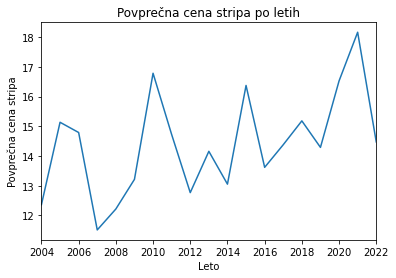

In [20]:
povprecna_cena_po_letih.plot()
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Povprečna cena stripa po letih')
plt.xlabel('Leto')
plt.ylabel('Povprečna cena')
plt.xlim(2004, 2022)

Vidimo, da povprečna cena v celoti raste. Opazimo tri velike skoke, in sicer leta: *2010*, *2015* in *2021*. Pogledamo sedanje cene iz naštetih treh obdobji.

In [35]:
stripi_s_ceno[stripi_s_ceno.leto == 2010]

,naslov,avtor,url,leto,format,sedanja_cena,prejsnja_cena,razlika,relativno_znizanje
id,,,,,,,,,
9780316080842,"Black Butler, Vol. 1",Yana Toboso,/Black-Butler-Vol-1-Yana-Toboso/9780316080842?...,2010,Paperback,12.02,14.0,1.98,14.142857
9780316084260,"Black Butler, Vol. 3",Yana Toboso,/Black-Butler-Vol-3-Yana-Toboso/9780316084260?...,2010,Paperback,11.35,14.0,2.65,18.928571
9780759530485,"Soul Eater, Vol. 2",Atsushi Ohkubo,/Soul-Eater-Vol-2-Atsushi-Ohkubo/9780759530485...,2010,Paperback,12.45,14.0,1.55,11.071429
9781421525839,"Pluto: Urasawa x Tezuka, Vol. 5",Takashi Nagasaki,/Pluto-Urasawa-x-Tezuka-Vol-5-Takashi-Nagasaki...,2010,Paperback,13.87,15.0,1.13,7.533333
9781421528441,"One Piece, Vol. 23",Eiichiro Oda,/One-Piece-Vol-23-Eiichiro-Oda/9781421528441?r...,2010,Paperback,8.94,10.0,1.06,10.600000
9781421533438,"Pluto: Urasawa x Tezuka, Vol. 8",Takashi Nagasaki,/Pluto-Urasawa-x-Tezuka-Vol-8-Takashi-Nagasaki...,2010,Paperback,11.29,15.0,3.71,24.733333
9781421535135,"Bakuman., Vol. 1",Tsugumi Ohba,/Bakuman-Vol-1-Tsugumi-Ohba/9781421535135?ref=...,2010,Paperback,8.86,11.5,2.64,22.956522
9781591166986,The Art of My Neighbor Totoro,Hayao Miyazaki,/Art-My-Neighbor-Totoro-Hayao-Miyazaki/9781591...,2010,Hardback,28.21,34.5,6.29,18.231884
9781595823724,Berserk Volume 33,Kentaro Miura,/Berserk-33-Kentaro-Miura/9781595823724?ref=gr...,2010,Paperback,15.84,17.0,1.16,6.823529


In [37]:
stripi_s_ceno[stripi_s_ceno.leto == 2015].sort_values("sedanja_cena", ascending = False)

,naslov,avtor,url,leto,format,sedanja_cena,prejsnja_cena,razlika,relativno_znizanje
id,,,,,,,,,
9781421526102,Bleach Box Set,Tite Kubo,/Bleach-Box-Set-Tite-Kubo/9781421526102?ref=gr...,2015,Paperback,121.68,167.5,45.82,27.355224
9781632361813,Attack On Titan: Colossal Edition 2,Hajime Isayama,/Attack-On-Titan-Colossal-Edition-2-Hajime-Isa...,2015,Paperback,47.79,54.5,6.71,12.311927
9781612628035,Vinland Saga Vol. 6,Makoto Yukimura,/Vinland-Saga-Vol-6-Makoto-Yukimura/9781612628...,2015,Hardback,24.19,25.0,0.81,3.240000
9781421569116,"Monster: The Perfect Edition, Vol. 6",Naoki Urasawa,/Monster-Perfect-Edition-Vol-6-Naoki-Urasawa/9...,2015,Paperback,19.94,20.5,0.56,2.731707
9781421569093,Monster,Naoki Urasawa,/Monster-Naoki-Urasawa/9781421569093?ref=grid-...,2015,Paperback,17.77,21.0,3.23,15.380952
...,...,...,...,...,...,...,...,...,...
9781421564616,"One-Punch Man, Vol. 3",One,/One-Punch-Man-Vol-3-One/9781421564616?ref=gri...,2015,Paperback,9.75,11.5,1.75,15.217391
9781421576084,"Assassination Classroom, Vol. 2",Yusei Matsui,/Assassination-Classroom-Vol-2-Yusei-Matsui/97...,2015,Paperback,9.73,10.5,0.77,7.333333
9781421576091,"Assassination Classroom, Vol. 3",Yusei Matsui,/Assassination-Classroom-Vol-3-Yusei-Matsui/97...,2015,Paperback,9.68,10.0,0.32,3.200000


In [39]:
stripi_s_ceno[stripi_s_ceno.leto == 2021].sort_values("sedanja_cena", ascending = False)

,naslov,avtor,url,leto,format,sedanja_cena,prejsnja_cena,razlika,relativno_znizanje
id,,,,,,,,,
9781632364616,Akira 35th Anniversary Box Set,Katsuhiro Otomo,/Akira-35th-Anniversary-Box-Set-Katsuhiro-Otom...,2021,Hardback,209.71,215.5,5.79,2.686775
9781974725953,Demon Slayer Complete Box Set,Koyoharu Gotouge,/Demon-Slayer-Complete-Box-Set-Koyoharu-Gotoug...,2021,Paperback,172.68,204.5,31.82,15.559902
9781506717920,Berserk Deluxe Volume 9,Kentaro Miura,/Berserk-Deluxe-9-Kentaro-Miura/9781506717920?...,2021,Hardback,52.26,54.5,2.24,4.110092
9781506717906,Berserk Deluxe Volume 7,Kentaro Miura,/Berserk-Deluxe-7-Kentaro-Miura/9781506717906?...,2021,Hardback,46.11,54.0,7.89,14.611111
9781646510771,Vinland Saga 12,Makoto Yukimura,/Vinland-Saga-12-Makoto-Yukimura/9781646510771...,2021,Hardback,25.00,25.5,0.50,1.960784
...,...,...,...,...,...,...,...,...,...
9781974721016,"My Hero Academia, Vol. 27",Kohei Horikoshi,/My-Hero-Academia-Vol-27-Kohei-Horikoshi/97819...,2021,Paperback,9.53,10.5,0.97,9.238095
9781974722815,"Dragon Ball Super, Vol. 13",AKIRA TORIYAMA,/Dragon-Ball-Super-Vol-13-AKIRA-TORIYAMA/97819...,2021,Paperback,8.84,12.0,3.16,26.333333
9781974722839,"Haikyu!!, Vol. 44",Haruichi Furudate,/Haikyu-Vol-44-Haruichi-Furudate/9781974722839...,2021,Paperback,8.82,10.5,1.68,16.000000


Za leto *2005* si lahko razlagamo, da je to posledica dejstva, da je število izdanih stripov majhno, zato je zaradi nekaterih dražjih povprečje toliko večje. V letih *2011* kot tudi *2021* pa je bila izdana, tako imenovana *Box Set* različica stripov, kar je ponavadi 10 izvodov znotraj enega prodajanega izdelka, kar spet dvigne povprečno ceno.

V naslednjem grafu sem opazoval leto in povprečno znižanje na leto, ter poskušal najti korelacijo med letom izida posameznih stripov in znižanjem cene.

Text(0, 0.5, 'Znižanje')

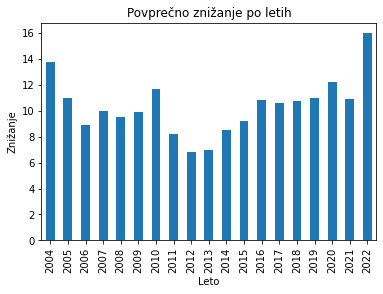

In [41]:
stripi_s_ceno = stripi_s_ceno.assign(relativno_znizanje = (stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena)/stripi_s_ceno.prejsnja_cena * 100)
neki = stripi_s_ceno.groupby("leto").relativno_znizanje.mean().plot.bar()
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Povprečno znižanje po letih')
plt.xlabel('Leto')
plt.ylabel('Znižanje')

Na prvi pogled neke očitno povezave res ni, lahko pa opazimo, da je največje znižanje aktualnega leta. To je verjetno posledica tega, da so najbolj aktualni in zaželeni najnovejši izvodi, zato z znižanjem stripov danega leta največ povečajo prodajo (posledica je najbolj očitna).

In [48]:
stripi_s_ceno = stripi_s_ceno.assign(relativno_znizanje = (stripi_s_ceno.prejsnja_cena - stripi_s_ceno.sedanja_cena)/stripi_s_ceno.prejsnja_cena * 100)

relativno_znizanje_cene_glede_na_avtorje_max = stripi_s_ceno.groupby("avtor").relativno_znizanje.mean().sort_values(ascending=False).head(15)
relativno_znizanje_cene_glede_na_avtorje_min = stripi_s_ceno.groupby("avtor").relativno_znizanje.mean().sort_values().head(15)

Naprej sem analiziral povezavo med avtorji z največ prodanih izvodov oziroma različnih stripov, ter povprečno znižanje cene glede na avtorje. Pogledal sem si prvih deset in zadnjih deset vrednosti (in avtorjev) obeh spremeljivk.

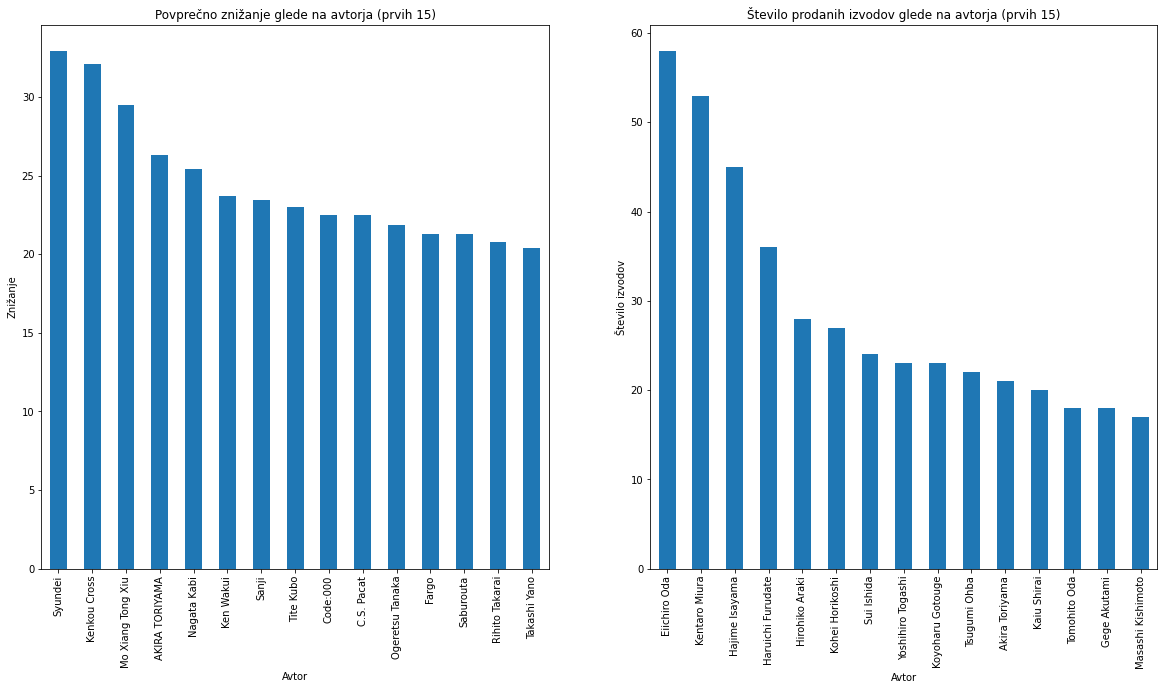

In [155]:
najvec_avtorji = stripi.groupby("avtor").count().sort_values("naslov", ascending=False).head(15)["naslov"]

plt.subplot(1,2,1)
relativno_znizanje_cene_glede_na_avtorje_max.plot.bar(figsize=(20, 10))
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Povprečno znižanje glede na avtorja (prvih 15)')
plt.xlabel('Avtor')
plt.ylabel('Znižanje')


plt.subplot(1,2,2)
najvec_avtorji.plot.bar(figsize=(20, 10))
plt.title('Število prodanih izvodov glede na avtorja (prvih 15)')
plt.xlabel('Avtor')
plt.ylabel('Število izvodov')

plt.show()

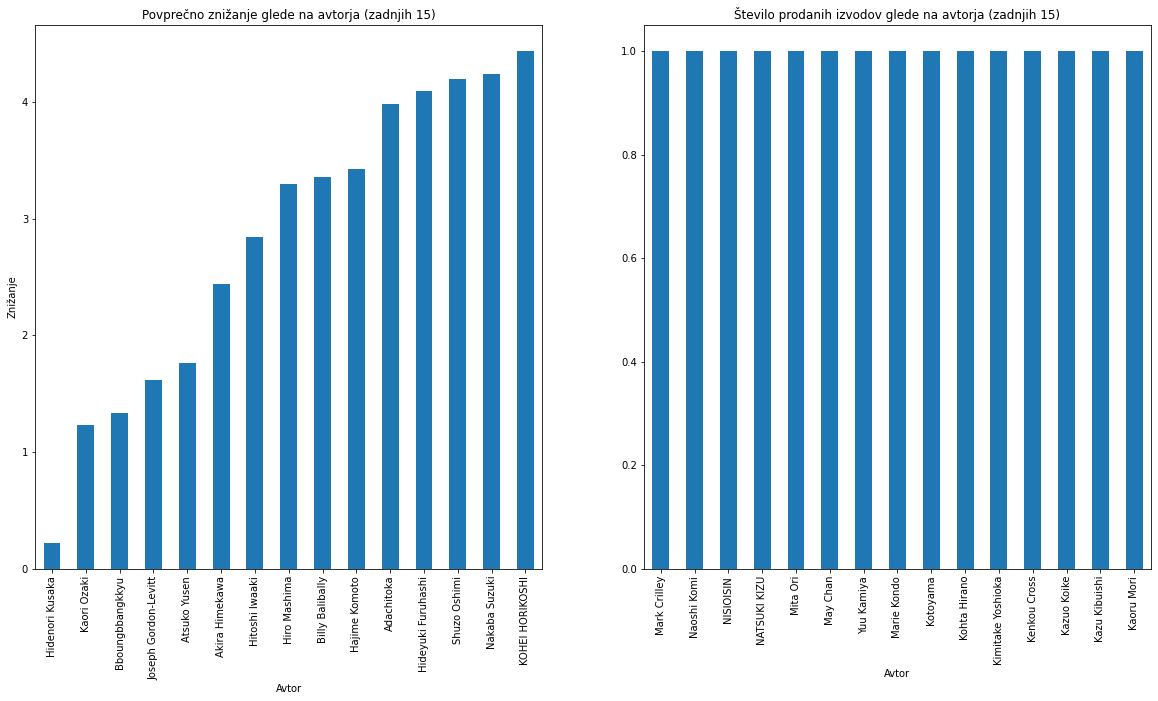

In [156]:
plt.subplot(1,2,1)
relativno_znizanje_cene_glede_na_avtorje_min.plot.bar(figsize=(20, 10))
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Povprečno znižanje glede na avtorja (zadnjih 15)')
plt.xlabel('Avtor')
plt.ylabel('Znižanje')

najvec_avtorji = stripi.groupby("avtor").count().sort_values("naslov", ascending=True).head(15)["naslov"]
plt.subplot(1,2,2)
najvec_avtorji.plot.bar(figsize=(20, 10))
plt.title('Število prodanih izvodov glede na avtorja (zadnjih 15)')
plt.xlabel('Avtor')

plt.show()

Ujemanj ni, tako da lahko predvidevamo, da korelacija med danima spremeljivkama neobstaja oziroma je enaka 0.

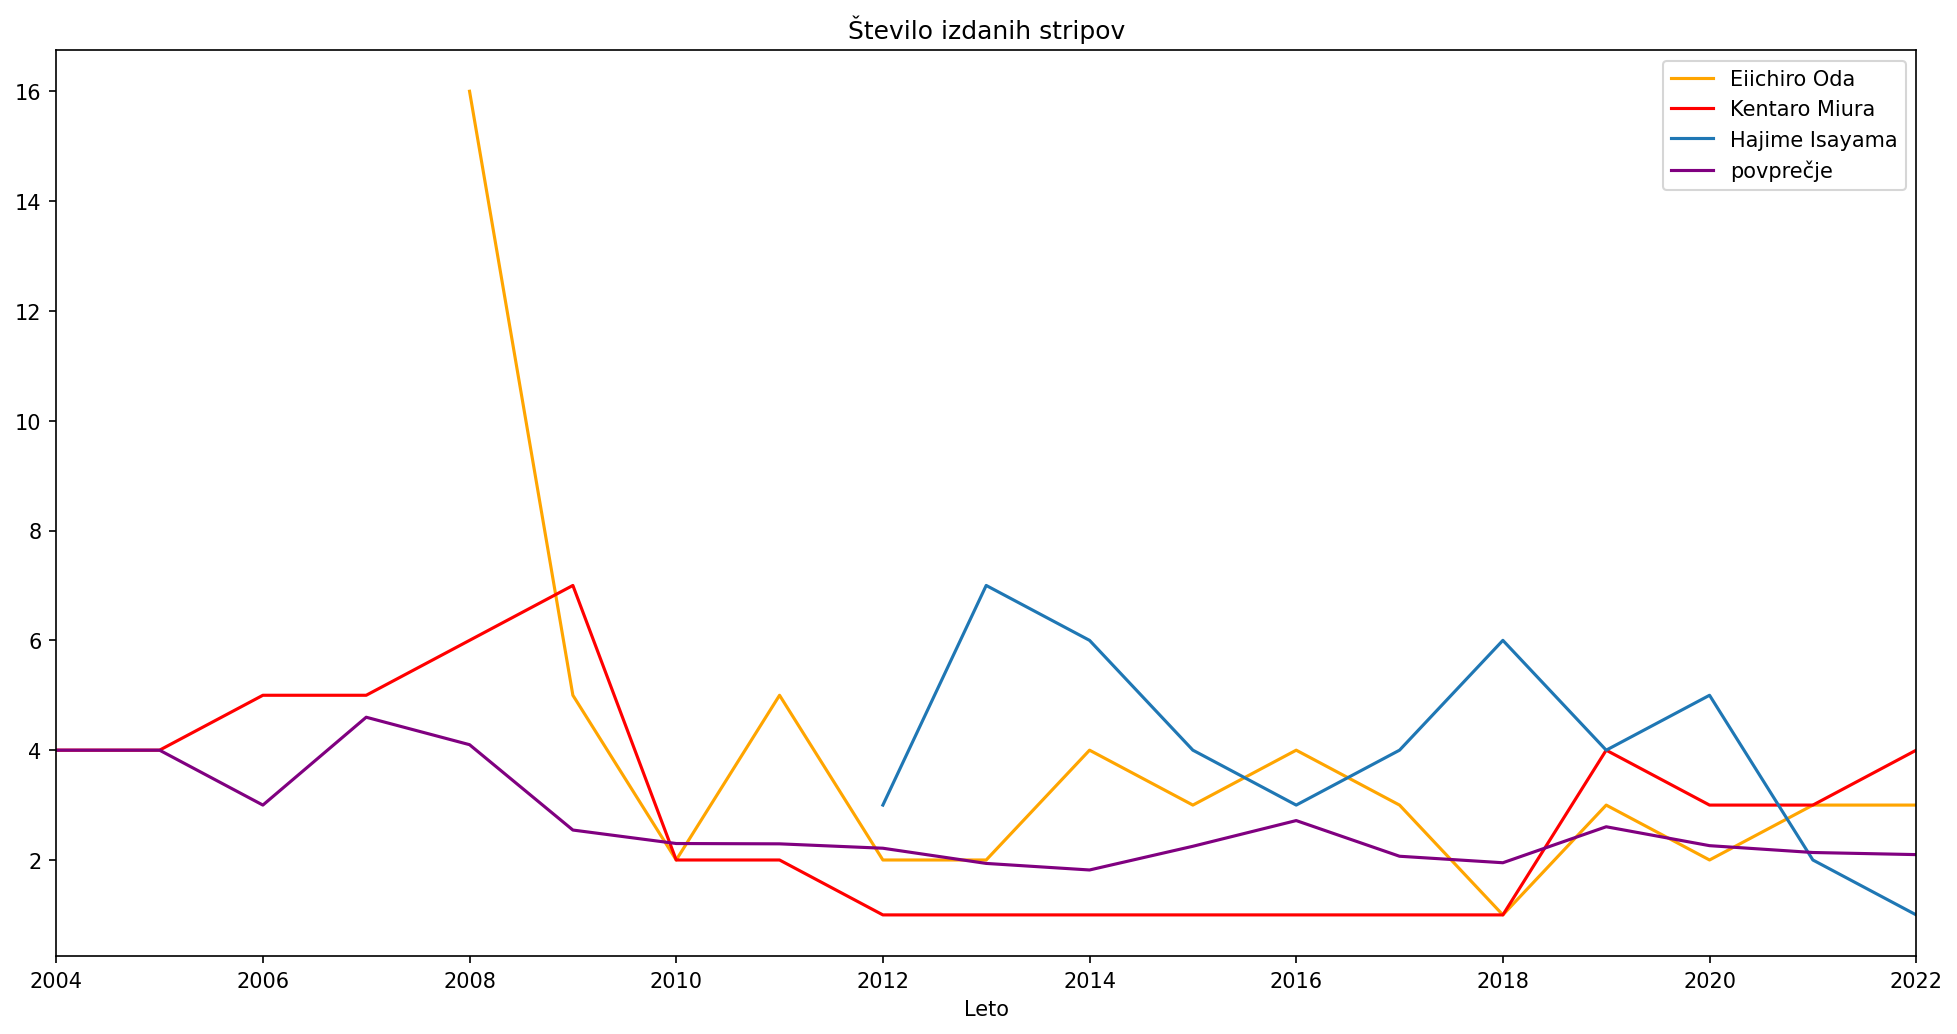

In [98]:
najbolj_prodajani_1 = stripi[(stripi.avtor == "Eiichiro Oda")]
najbolj_prodajani_2 = stripi[(stripi.avtor == "Kentaro Miura")]
najbolj_prodajani_3 = stripi[(stripi.avtor == "Hajime Isayama")]

st_vseh_izvodov_po_letih = stripi.groupby("leto").count()["naslov"] #stevilo razlicnih izvodov po letih
st_avtorjev_po_letih = stripi.groupby("leto").nunique() #stevlo razlicnih avtorjev
povprecno_stevilo_izvodov = pd.merge(st_vseh_izvodov_po_letih, st_avtorjev_po_letih, left_on="leto", right_on="leto")[["naslov_x", "avtor"]]
povprecno_stevilo_izvodov["Povprečno število novo izdanih stripov"] = povprecno_stevilo_izvodov.naslov_x / povprecno_stevilo_izvodov.avtor

plt.figure(figsize=(16, 8), dpi=150)
  
najbolj_prodajani_1.groupby("leto").naslov.count().plot(label='Eiichiro Oda', color='orange')
najbolj_prodajani_2.groupby("leto").naslov.count().plot(label='Kentaro Miura', color='red')
najbolj_prodajani_3.groupby("leto").naslov.count().plot(label='Hajime Isayama')
povprecno_stevilo_izvodov["Povprečno število novo izdanih stripov"].plot(label="povprečje", color="purple")
plt.xlim(2004, 2022)
  
plt.title('Število izdanih stripov')
  
plt.xlabel('Leto')
  
plt.legend()

Za 3 avtorje z največ izdani izvodi sem prikazal izdajanje stripov po letih. Zraven se dodal se povprečje izdanih stripov po letih, ki sem ga dobil tako, da sem v posameznem letu število izdanih stripov delil z vsemi avtorji, ki so v danem letu izdali strip (oziroma ga je izdala založba pod njihovim imenom). Zanimivo je, da sta v večini nad povprečjem samo prvi in tretji avtor z največ izdani izvodi, drugi pa je v polovici obdobja pod povprečjem.

V nadaljevanju sem analiziral koliko je posameznih izvodov glede na različne intervale cen. Vrednosti sem razdelil na tri skupine:
* sedanja cena $\leq$ 10
* 10 $<$ sedanja cena $\leq$ 20
* 20 $>$ sedanja cena

Število izvodov danih skupin sem seštel in primerjal vrednosti po letih. 

Text(0, 0.5, 'Cena')

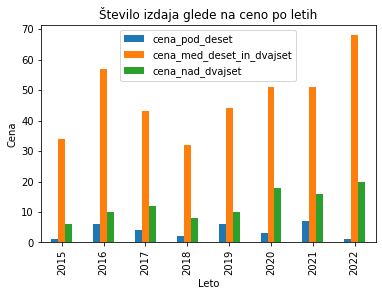

In [24]:
cena_pod_deset = stripi_s_ceno[stripi_s_ceno.sedanja_cena <= 10.0].groupby("leto").count()[["naslov"]][6:]
cena_med_deset_in_dvajset = stripi_s_ceno[(stripi_s_ceno.sedanja_cena <= 20.0) & (stripi_s_ceno.sedanja > 10.0)].groupby("leto").count()[["naslov"]][11:]
cena_nad_dvajset = stripi_s_ceno[stripi_s_ceno.sedanja_cena > 20.0].groupby("leto").count()[["naslov"]][6:]

cena_skupaj = pd.merge(cena_pod_deset, cena_med_deset_in_dvajset, left_on="leto", right_on="leto")
cene_skupaj_vse = pd.merge(cena_skupaj, cena_nad_dvajset, left_on="leto", right_on="leto")

cene_skupaj_vse.rename(columns = {'naslov_x':'cena_pod_deset'}, inplace = True)
cene_skupaj_vse.rename(columns = {'naslov_y':'cena_med_deset_in_dvajset'}, inplace = True)
cene_skupaj_vse.rename(columns = {'naslov':'cena_nad_dvajset'}, inplace = True)

cene_skupaj_vse.plot.bar()
plt.title('Število izdaja glede na ceno po letih')
plt.xlabel('Leto')
plt.ylabel('Cena')

Po pričakovanjih ima velika večina stripov ceno med 10 in 20 £, kar je smiselno glede na prvi graf, saj lahko opazimo, da se povprečna cena vseskozi giblje ravno na tem intervalu.

Text(0, 0.5, 'Cena')

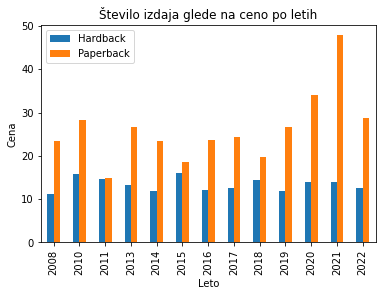

In [64]:
stripi_trda_platnica = stripi_s_ceno[stripi_s_ceno.format == "Hardback"]
stripi_trda_platnica_povprecje = stripi_trda_platnica.groupby("leto").sedanja_cena.mean()

stripi_papirnata_platnica = stripi_s_ceno[stripi_s_ceno.format == "Paperback"]
stripi_papirnata_platnica_povprecje = stripi_papirnata_platnica.groupby("leto").sedanja_cena.mean()

platnica_skupaj = pd.merge(stripi_papirnata_platnica_povprecje, stripi_trda_platnica_povprecje, left_on="leto", right_on="leto")

platnica_skupaj.rename(columns = {'sedanja_cena_x':'Hardback'}, inplace = True)
platnica_skupaj.rename(columns = {'sedanja_cena_y':'Paperback'}, inplace = True)

platnica_skupaj.plot.bar()
plt.title('Število izdaja glede na ceno po letih')
plt.xlabel('Leto')
plt.ylabel('Cena')

Izkaže se, da je povprečna cena papirnatiih platnic vsako leto večja od povprečne cene trdih platnic. Eden izmed vzrokov je sigurno dejstvo, da najdražja možna oblika stripov *Box Set* pripada kategoriji papirnate platnica, kar dvigne povprečje stripov dane skupine.

Text(0, 0.5, 'Cena')

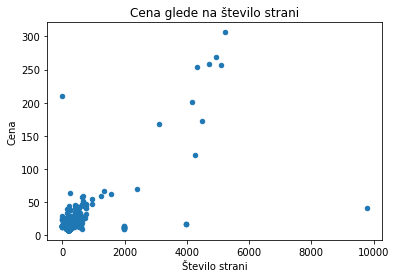

In [100]:
stripi_delni_id = stripi2.assign(delni_id=(stripi2.id//10))
stripi_delni_skupaj = pd.merge(stripi_delni_id, posamezni_stripi, left_on="delni_id", right_on="id")
stripi_delni_skupaj.plot.scatter('stevilo_strani', 'sedanja_cena')
plt.title('Cena glede na število strani')
plt.xlabel('Število strani')
plt.ylabel('Cena')

Naslednji graf predstavlja relacijo med številom strani in sedanjo ceno stripov. Večina stripov ima število strani v okolici 200 funtov, zato je tudi tam graf najgostejši. Vidimo pa tudi, da se večje število strani v večini primerov izraža tudi v dražjem stripu. Malce nenavadna vrednost stripa je ta, ki ima približno 10.000 strani (to je spet izdelek tipa *Box Set*) in pa ceno okoli 50 funtov. Morda je razlog v premajhnem povpraševanju.

In [95]:
stripi_delni_skupaj[stripi_delni_skupaj.stevilo_strani > 9000]

,id,avtor,url,leto,format,sedanja_cena,prejsnja_cena,delni_id,stevilo_strani,jezik,izdajatelj,drzava,opis
577,9781632366993,Hajime Isayama,/Attack-On-Titan-Season-1-Part-1-Manga-Box-Set...,2020,Paperback,41.15,48.0,978163236699,9784,English,"Kodansha America, Inc","New York, United States",Humanity has been ...


Na koncu sem si še pogledal stripe (oziroma izdelke) z najvišjo ceno. Kot pričakovano so bili najdražji izdelki tipa *Box Set*. Veliko jih tudi nima podatka o prejšnji ceni, kar pomeni, da večinoma za izdelke tega tipa ne pride do znižanja cen.

In [96]:
stripi.sort_values("sedanja_cena", ascending=False).head(10)

,naslov,avtor,url,leto,format,sedanja_cena,prejsnja_cena
id,,,,,,,
9781421525822,Naruto Box Set 1,Masashi Kishimoto,/Naruto-Box-Set-1-Masashi-Kishimoto/9781421525...,2008,Paperback,306.34,NaN
9781421576060,One Piece Box Set 2: Skypeia and Water Seven,Eiichiro Oda,/One-Piece-Box-Set-2-Skypeia-Water-Seven-Eiich...,2014,Paperback,269.55,NaN
9781421560748,One Piece Box Set 1: East Blue and Baroque Works,Eiichiro Oda,/One-Piece-Box-Set-1-East-Blue-Baroque-Works-E...,2013,Paperback,258.35,NaN
9781974708727,Dragon Ball Z Complete Box Set,Akira Toriyama,/Dragon-Ball-Z-Complete-Box-Set-Akira-Toriyama...,2019,Paperback,256.69,NaN
9781974725960,One Piece Box Set 4: Dressrosa to Reverie,Eiichiro Oda,/One-Piece-Box-Set-4-Dressrosa-Reverie-Eiichir...,2022,Paperback,253.40,NaN
9781632364616,Akira 35th Anniversary Box Set,Katsuhiro Otomo,/Akira-35th-Anniversary-Box-Set-Katsuhiro-Otom...,2021,Hardback,209.71,215.5
9781421580807,Naruto Box Set 2,Masashi Kishimoto,/Naruto-Box-Set-2-Masashi-Kishimoto/9781421580...,2015,Paperback,201.78,NaN
9781974725953,Demon Slayer Complete Box Set,Koyoharu Gotouge,/Demon-Slayer-Complete-Box-Set-Koyoharu-Gotoug...,2021,Paperback,172.68,204.5
9781974708710,Dragon Ball Complete Box Set,Akira Toriyama,/Dragon-Ball-Complete-Box-Set-Akira-Toriyama/9...,2019,Paperback,167.87,NaN


### Analiza prodanih izvodov glede na potrošnjo

In [6]:
zalozbe_avtorji_stripi = pd.merge(avtorji_in_zalozbe, stripi, left_on ="strip" , right_on = "id")
zalozbe_avtorji_stripi_imena = pd.merge(zalozbe_avtorji_stripi, zalozbe, left_on="izdajatelj", right_on="id")

stevilo_po_zalozbah = zalozbe_avtorji_stripi_imena.groupby("izdajatelj_y").count()[["izdajatelj_x"]]
cena_po_zalozbah = zalozbe_avtorji_stripi_imena.groupby("izdajatelj_y").sedanja_cena.mean()
cena_in_stevilo = pd.merge(cena_po_zalozbah, stevilo_po_zalozbah, left_on = "izdajatelj_y", right_on = "izdajatelj_y")

V naslednjem delu sem opazoval povezavo med ceno in založbami. Za to sem najprej prvi tabeli potreboval priključiti podatke, ki sem jih pridobil na posameznih straneh stripov, saj želeni podatki niso bili na glavni strani. Prvi graf predstavlja povprečno ceno na dano založbo,

Text(0.5, 0, 'Cena')

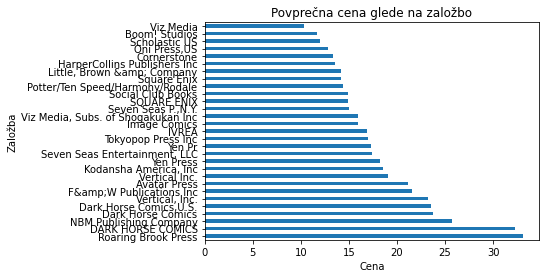

In [102]:
cena_po_zalozbah.sort_values(ascending=False).plot.barh(x='naslov', y='zasluzek')
plt.title('Povprečna cena glede na založbo')
plt.ylabel('Založba')
plt.xlabel('Cena')

drugi pa število izdanih izvodov glede na založbo.

Text(0.5, 0, 'Število izvodov')

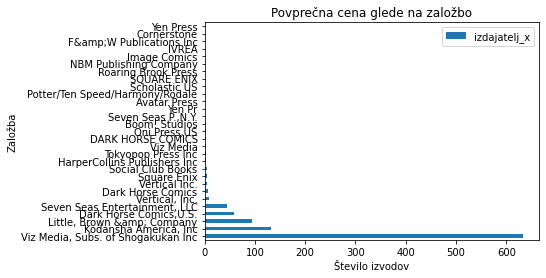

In [109]:
stevilo_po_zalozbah.sort_values("izdajatelj_x", ascending=False).plot.barh()
plt.title('Število izvodov glede na založbo')
plt.ylabel('Založba')
plt.xlabel('Število izvodov')

Vidimo, da založba z največjo selekcijo izvodov stripov prodaja tudi po najnižji ceni. Drugo uvrščena pa prodaja po približno povprečni ceni.

Naslednjo hipoteze, ki jo preverimo, je korelacija med avtorji in založbami glede števila  izdanih izvodov.

In [159]:
avtorji = zalozbe_avtorji_stripi_imena.groupby("avtor_y").count()
zalozbe_avtorji_stripi_imena[["avtor_y", "izdajatelj_y"]]
zalozbe_avtorji_stripi_imena["proba"] = zalozbe_avtorji_stripi_imena.izdajatelj_y  + ": " + zalozbe_avtorji_stripi_imena.avtor_y

Text(0, 0.5, 'Število izvodov')

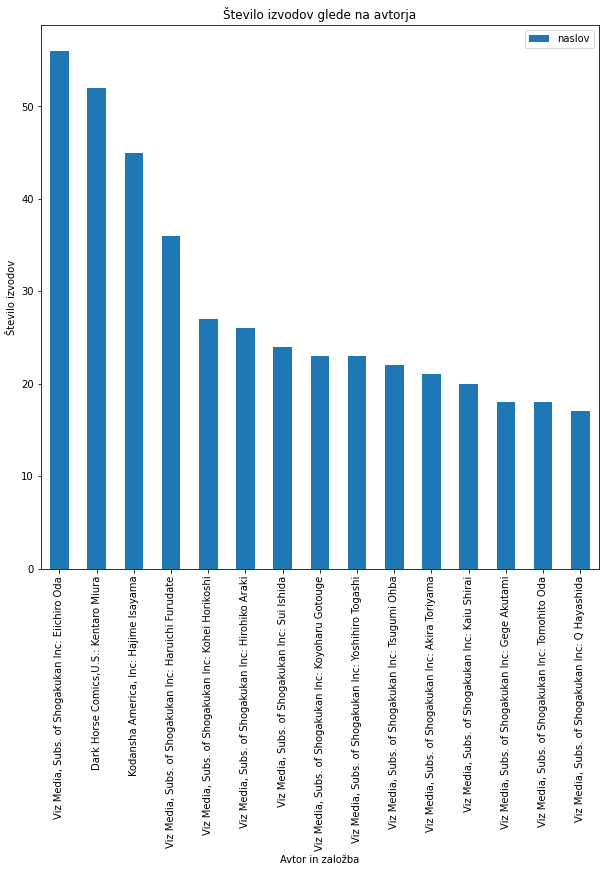

In [172]:
skupaj_zalozba_in_avtor = zalozbe_avtorji_stripi_imena.groupby("proba").count()
skupaj_zalozba_in_avtor[["naslov"]].sort_values("naslov", ascending=False).head(15).plot.bar(figsize=(10, 10))
plt.title('Število izvodov glede na avtorja')
plt.xlabel('Avtor in založba')
plt.ylabel('Število izvodov')


Opazimo, da velika večina avtor z največ izdani proizvodi, izdaja ravno pod *Viz Media, Subs. of Shogakukan Inc*, kar pa je tudi založba, ki izda največ različnih ivzodov stripov.

In [123]:
stripi_relativno_znizanje_zalozbe = pd.merge(stripi_s_ceno, zalozbe_avtorji_stripi_imena, left_on="naslov", right_on="naslov")
stripi_relativno_znizanje_po_zalozbah = stripi_relativno_znizanje_zalozbe.groupby("izdajatelj_y").relativno_znizanje.mean()

Na koncu sem si še pogledal ali obstaja povezava med založbo in pa znižanjem cene. Izkaže se, da imajo v povprečju založbe z več izdanimi izvodi manj znižane cene. Morda je to posledica tega, da imajo zaradi večje izbire izdelkom v vsakem primeru dovolj veliko povpraševanje in jim zato ni potrebno dodatno nižati cen.

Text(0, 0.5, '')

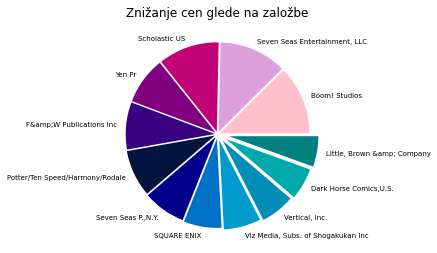

In [122]:
plt.rcParams['figure.figsize'] = [4,5]
colors = ['#FFC0CB', '#DDA0DD','#C20078','#800080','#380282', "#01153E",'#00008B', '#0071C6', '#009ACD', '#008DB8','#00AAAA','#008080']
stripi_relativno_znizanje_po_zalozbah.sort_values(ascending = False).head(12).plot.pie(
    explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.035, 0.04, 0.05, 0.07, 0.09, 0.11, 0.13,),
    colors = colors,
    title = 'Znižanje cen glede na založbe',
    textprops={'fontsize': 7})
pylab.ylabel('')

## REZULTATI